## Regresyon Uygulamaları
Bu derste doğrusal regresyon uygulamalarının birçok yapay öğrenme kaynağında önerildiği Boston Veri kümesi üzerinde kullanarak görelim. Bu veri seti Boston Şehrinde farklı bölgelerden toplanmış konut örneklerini içerir. Bağımlı değişken 1000 $ cinsinden medyan ev fiyatlarıdır.



In [4]:
from sklearn import datasets
boston=datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# Veri seti ile ilgili ayrıntılı bilgi 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
import pandas as pd
boston_df=pd.DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df['MEDV']=boston.target
print(boston_df.head(100))
print(boston_df.tail())

       CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0   0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..      ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
95  0.12204   0.0   2.89   0.0  0.445  ...  276.0     18.0  357.98   6.65  28.4
96  0.11504   0.0   2.89   0.0  0.445  ...  276.0     18.0  391.83  11.34  21.4
97  0.12083   0.0   2.89   0.0  0.445  ...  276.0     18.0  396.90   4.21  38.7
98  0.08187   0.0   2.89   0.0  0.445  ...  276.0     18.0  393.53   3.57  43.8
99  0.06860   0.0   2.89   0.0  0.445  ...  276.0     18.0  396.90   6.19  33.2

[100 rows x 14 columns]
        CRIM   

İlk olarak konut fiyatları(MEDV) ile LSTAT değişkeni arasındaki ilişkiyi inceleyelim. LSTAT değişkeni mahallede yaşayan düşük gelirli oranını ifade eder. Dolayısıyla düşük gelir grubu oranı arttıkça ev fiyatlarının düşmesini bekleriz.

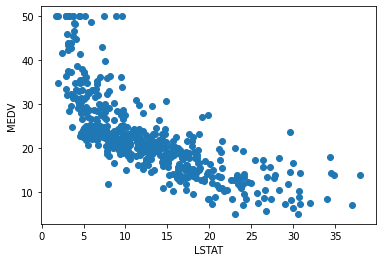

In [9]:
import matplotlib.pyplot as plt
plt.scatter(boston_df['LSTAT'],boston_df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [12]:
# Bağımsız değişken ve bağımlı değişken tanımı
lstat=boston_df[['LSTAT']].values
medv=boston_df['MEDV'].values
import numpy as np
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(lstat,medv)
print(model.coef_)
print(model.intercept_)

[-0.95004935]
34.5538408793831


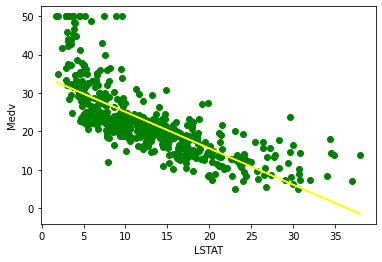

In [14]:
import matplotlib.pyplot as plt
plt.scatter(lstat,medv,color='green')
plt.plot(lstat,model.predict(lstat),color='yellow')
plt.xlabel('LSTAT')
plt.ylabel('Medv')
plt.show()

Bulduğumuz modelin teta0 ve teta1 değerlerini öğrenme

In [ ]:
#teta0
print(model.intercept_)
#teta1
print(model.coef_)

34.5538408793831
[-0.95004935]


# Model Başarısını Ölçme
Regresyonda model başarımı R2 değeri ile ölçülür. Bu değer .score() metodu çağrılarak yapılır.





In [15]:
model.score(lstat,medv)

0.5441462975864797

İkinci yol

In [ ]:
yt=model.predict(lstat)
y=medv
RSS=sum((y-yt)**2)
TSS=sum((y-np.mean(y))**2)
R2=1-RSS/TSS
R2

0.5441462975864798

# Polinomal Regresyon
Doğrusal regresyondaki doğrusal kelimesi sizi yanıltmasın. Bu ifade ilişkinin doğrusal olduğu anlamına gelmiyor. Bağıntıdaki tetaların 1. ve 2. dereceden olduğu anlamına geliyor. İkinci ve üçüncü derecen değişkenlerin üslerini de kullanabiliriz.

In [16]:
boston_df['LSTAT2']=boston_df['LSTAT']**2
boston_df['LSTAT3']=boston_df['LSTAT']**3
X=boston_df[['LSTAT','LSTAT2','LSTAT3']].values
Y=boston_df['MEDV'].values
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(10, 45, '$medv=\\beta_0+\\beta_1.lstat+\\beta_2.lstat^2+\\beta_3.lstat^3$')

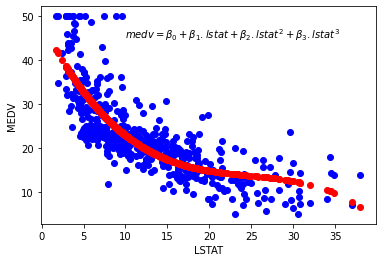

In [ ]:
plt.scatter(X[:,0],y,color='blue')
plt.scatter(X[:,0],model.predict(X),color='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.text(10,45,r'$medv=\beta_0+\beta_1.lstat+\beta_2.lstat^2+\beta_3.lstat^3$')

In [ ]:
model.score(X,Y)

0.657847640589572